<a href="https://colab.research.google.com/github/mrSaggio/NEIRO/blob/main/Classificator_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow
# for gpu
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
!pip install pillow matplotlib

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
batch_size = 32 # input batch size
img_size = (180, 180) # height x width

In [7]:
# read training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/all_truba_digits", # directory path
    validation_split=0.2, # we use 80% data for training
    subset="training",
    seed=123,
    image_size=(img_size[0], img_size[1]), # image height and width
    batch_size=batch_size # batch size
)

Found 3691 files belonging to 11 classes.
Using 2953 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/all_truba_digits",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_size[0], img_size[1]),
    batch_size=batch_size
)

Found 3691 files belonging to 11 classes.
Using 738 files for validation.


In [19]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Symbol']


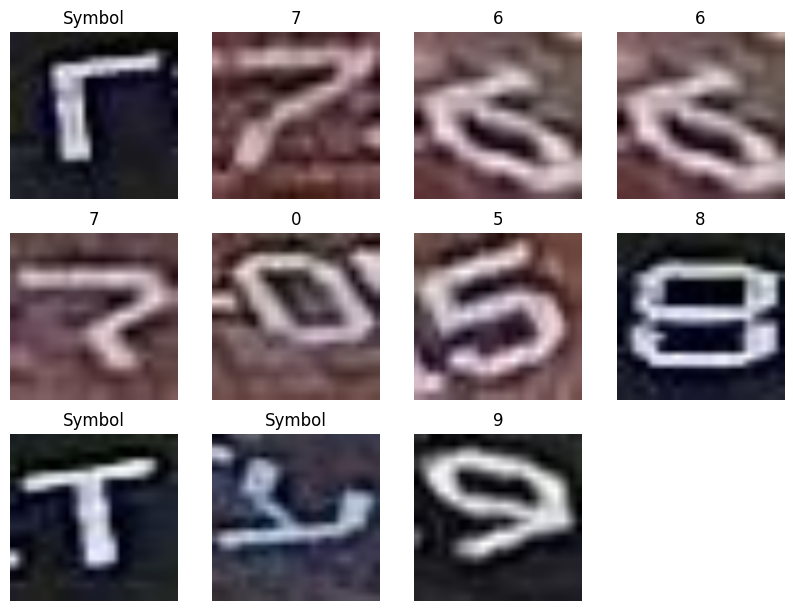

In [22]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(11):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [23]:
# keras preprocessing normalization
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

# Normalize dataset
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

In [24]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_size[0], img_size[1], 3)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(256, activation="relu"))
model.add(Dense(11))
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
93/93 [==============================] - 415s 4s/step - loss: 0.8221 - accuracy: 0.7491 - val_loss: 0.0373 - val_accuracy: 0.9946
Epoch 2/10
93/93 [==============================] - 216s 2s/step - loss: 0.0224 - accuracy: 0.9946 - val_loss: 0.0309 - val_accuracy: 0.9932
Epoch 3/10
93/93 [==============================] - 215s 2s/step - loss: 0.0092 - accuracy: 0.9973 - val_loss: 4.7839e-04 - val_accuracy: 1.0000
Epoch 4/10
93/93 [==============================] - 217s 2s/step - loss: 1.3151e-04 - accuracy: 1.0000 - val_loss: 7.3609e-05 - val_accuracy: 1.0000
Epoch 5/10
93/93 [==============================] - 220s 2s/step - loss: 4.6064e-05 - accuracy: 1.0000 - val_loss: 4.8279e-05 - val_accuracy: 1.0000
Epoch 6/10
93/93 [==============================] - 220s 2s/step - loss: 3.1915e-05 - accuracy: 1.0000 - val_loss: 3.5831e-05 - val_accuracy: 1.0000
Epoch 7/10
93/93 [==============================] - 216s 2s/step - loss: 2.4248e-05 - accuracy: 1.0000 - val_loss: 2.8280e-05 

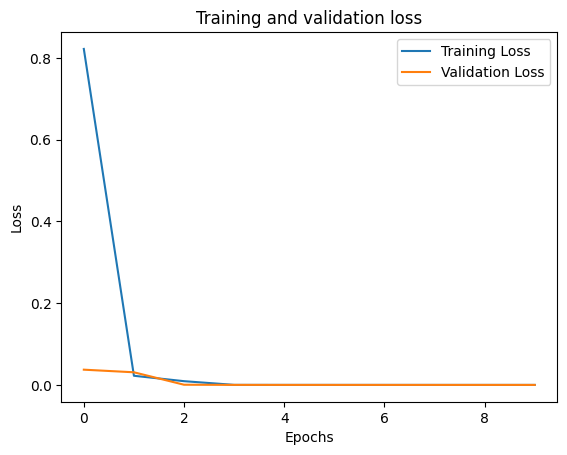

In [27]:
# show training and validation loss
plt.plot(range(epochs), history.history['loss'], label="Training Loss")
plt.plot(range(epochs), history.history['val_loss'], label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.show()

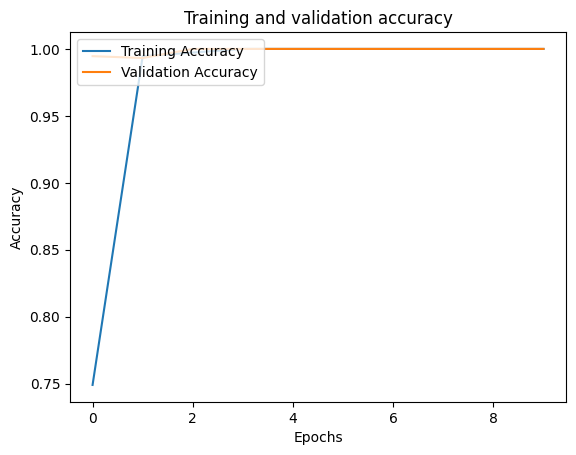

In [28]:
# show training and validation accuracy
plt.plot(range(epochs), history.history['accuracy'], label="Training Accuracy")
plt.plot(range(epochs), history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.show()

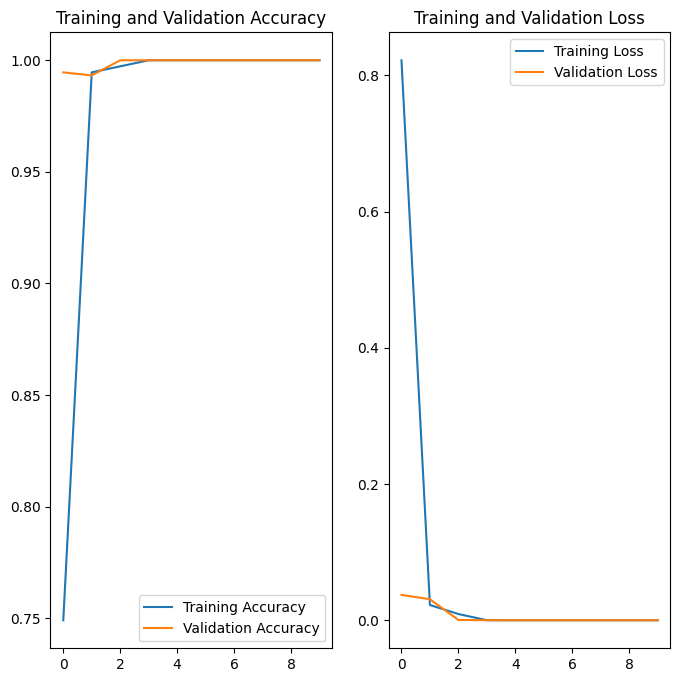

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()